In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline #sets the backend of matplotlib to 'inline' backened
from datetime import datetime
from pandas.plotting import autocorrelation_plot

UsageError: unrecognized arguments: #sets the backend of matplotlib to 'inline' backened


<h1>3.0 Predicting S&P 500 Index value </h1>

In [2]:
#this dataset contains the index value of S&P 500 
sp500_ind = pd.read_csv(r'C:\Users\DELL\Desktop\Final Project\i. hist_data\sp500_ind.csv',encoding='utf-8')

In [3]:
sp500_ind.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,0,2017-06-15,2424.139893,2433.949951,2418.530029,2432.459961,2432.459961,3353050000,SP500_Ind
1,1,2017-06-16,2431.239990,2433.149902,2422.879883,2433.149902,2433.149902,5284720000,SP500_Ind
2,2,2017-06-19,2442.550049,2453.820068,2441.790039,2453.459961,2453.459961,3264700000,SP500_Ind
3,3,2017-06-20,2450.659912,2450.659912,2436.600098,2437.030029,2437.030029,3416510000,SP500_Ind
4,4,2017-06-21,2439.310059,2442.229980,2430.739990,2435.610107,2435.610107,3594820000,SP500_Ind


In [4]:
#given date columns is object type, so converting it to Date type
sp500_ind['Date'] = pd.to_datetime(sp500_ind['Date'])

In [5]:
sp500_ind.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,0,2017-06-15,2424.139893,2433.949951,2418.530029,2432.459961,2432.459961,3353050000,SP500_Ind
1,1,2017-06-16,2431.239990,2433.149902,2422.879883,2433.149902,2433.149902,5284720000,SP500_Ind
2,2,2017-06-19,2442.550049,2453.820068,2441.790039,2453.459961,2453.459961,3264700000,SP500_Ind
3,3,2017-06-20,2450.659912,2450.659912,2436.600098,2437.030029,2437.030029,3416510000,SP500_Ind
4,4,2017-06-21,2439.310059,2442.229980,2430.739990,2435.610107,2435.610107,3594820000,SP500_Ind


In [6]:
sp_series = sp500_ind[['Date','Close']]

In [7]:
sp_series.set_index('Date',inplace=True, drop = True)

In [8]:
sp_series.head()

,Close
Date,
2017-06-15,2432.459961
2017-06-16,2433.149902
2017-06-19,2453.459961
2017-06-20,2437.030029
2017-06-21,2435.610107


Date column is set to index, so that time series processing could become fast

<h3>Plotting the data</h3>

- A time-series dataset does not make sense to us until we plot it.

- Plotting a time series helps us actually see if there is a trend, a seasonal cycle, outliers, and more. It gives us a feel for the data

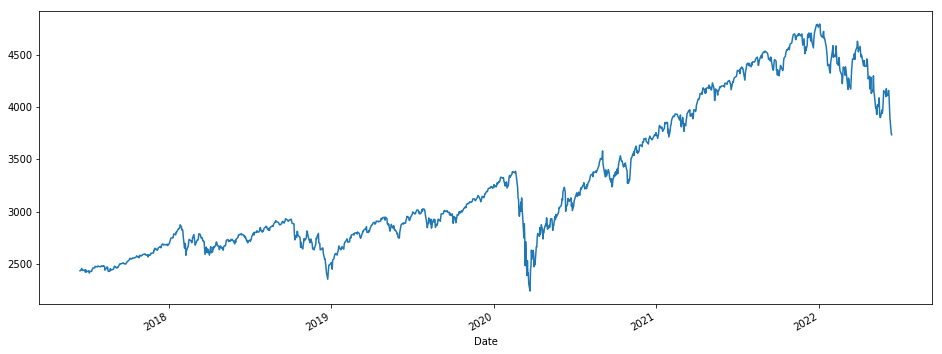

In [9]:
sp_series['Close'].plot(figsize = (16,6))

- We can see that the S&P500 ind values has both up & down  trend.

- This suggests that the time series is not stationary and will require differencing to make it stationary, at least a differencing of order 1.


<h2> Daily fluctuations in S&P 500 values </h2>
- This will be our benchmark to compare the error distribution.

Mean abs daily fluctuation in index value is : 0.805 %


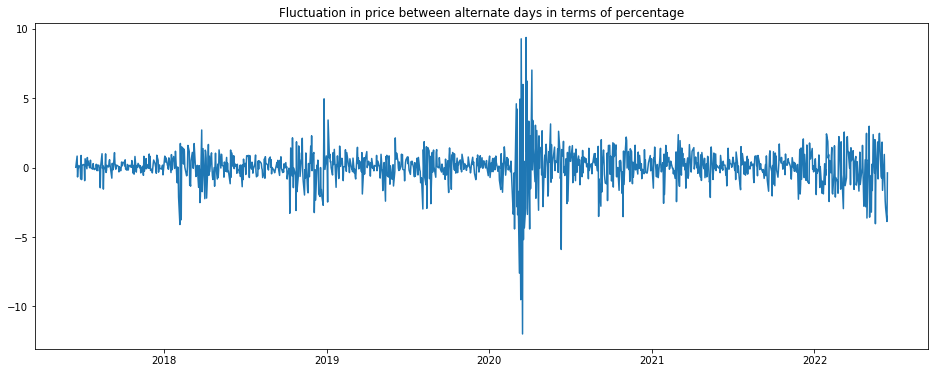

In [60]:
fig, ax = plt.subplots(figsize=(16,6))
daily_fluctuation = sp_series.Close.diff()/sp_series.Close.shift(1) * 100 #this will calculate price difference between alternate days
avg_fluctuations = abs(daily_fluctuation).mean()
ax.plot(daily_fluctuation)
ax.set_title('Fluctuation in price between alternate days in terms of percentage')
print(f'Mean abs daily fluctuation in index value is : {avg_fluctuations:.3f} %')
plt.show()


- From the above plot we can see that before covid in most cases fluctuation in index values on alternate days was between 0% - 1% but after covid it increased and reached in the range of 0% - 4%.
- But, During covid period daily fluctuation reached to even 10%, which tells us how volatile the market had become during covid time

<h2>Time Series Decomposition</h2>

In time series analysis for forecasting new values, it is very important to know about the past data. More formally, we can say it is very important to know about the patterns which are followed by the values with time. There can be many reasons which cause our forecasted values to fall in the wrong direction. Basically, a time series consists of four components. Variation of those components causes the change in the pattern of the time series. These components are:

- <b>Level</b>: It is the main value that goes on average with time.


- <b>Trend</b>: The trend is the value that causes increasing or decreasing patterns in a time series.


- <b>Seasonality</b>: This is a cyclic event that occurs in time series for a short time and causes the increasing or decreasing patterns for a short time in a time series.


- <b>Noise</b>: These are the random variations in the time series.

    
The combination of those components with time causes the formation of a time series. Most time series consists of the level and 
noise/residual and the trend or seasonality are the optional values. They may take part or they may not. 

We will use Multiplicative time series decomposition instead of additive because this series is not stationery

-                <b>y(t) = Level × Trend × seasonality × Noise</b>

<h3>a. Yearly seasonality</h3>

In [11]:
import statsmodels.api as sm

In [12]:
yr_seas = sm.tsa.seasonal_decompose(sp_series['Close'], model = 'multiplicative', freq = 252) 

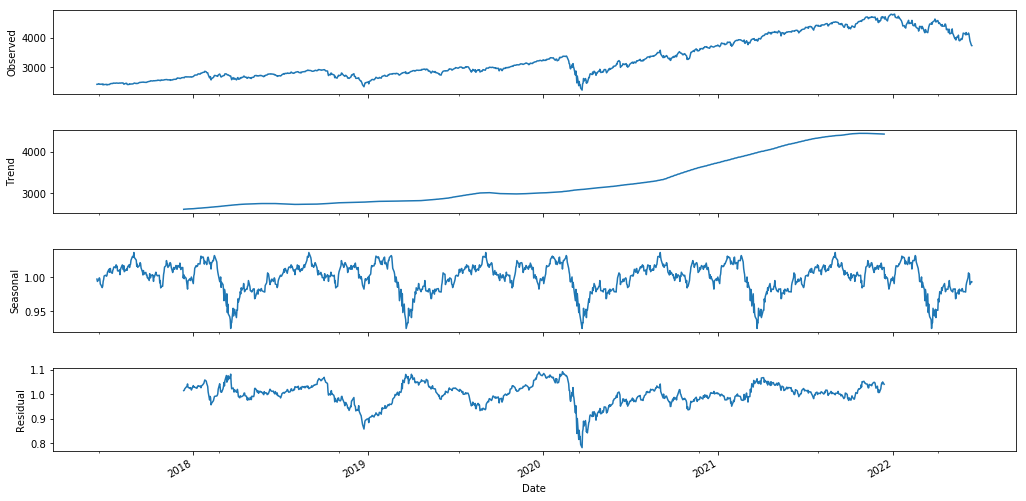

In [13]:
fig = yr_seas.plot();
fig.set_size_inches((16, 8))
plt.show();

<h5> Conclusion </h5>
- Clearly there is a uptrend in S&P 500 index from 2018 to 2022.
- But there is no clear cyclic pattern in seasonal component for time period of one year.
- And the residual error is also high as compared to seasonal component, and it is non gaussian as well which is expected to be gaussian.

<h3>b. Half Year Seasonality</h3>

In [14]:
half_yr_seas = sm.tsa.seasonal_decompose(sp_series['Close'], model = 'multiplicative', freq = 176) #multiplicative instead of additive because this series is not stationery

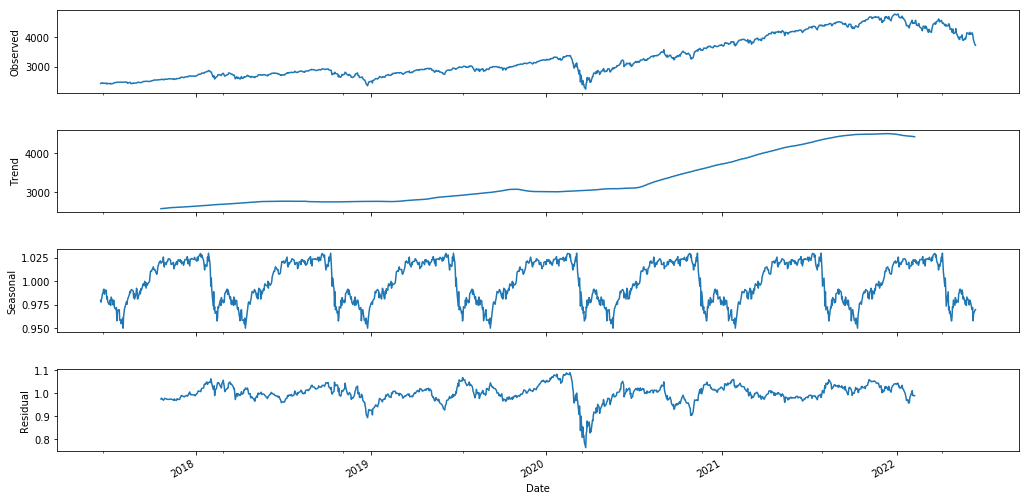

In [15]:
fig = half_yr_seas.plot();
fig.set_size_inches((16, 8))
plt.show();

<h5> Conclusion </h5>
- Clearly there is a uptrend in S&P 500 index.
- But again there is no clear cyclic pattern in seasonal component for time period of half year too.
- And the residual error is also high as compared to seasonal component, and, it is non gaussian as well which is expected to be gaussian.

<h3>c. Monthly Seasonality</h3>

In [16]:
mn_seas = sm.tsa.seasonal_decompose(sp_series['Close'], model = 'multiplicative', freq = 21) #multiplicative instead of additive because this series is not stationery

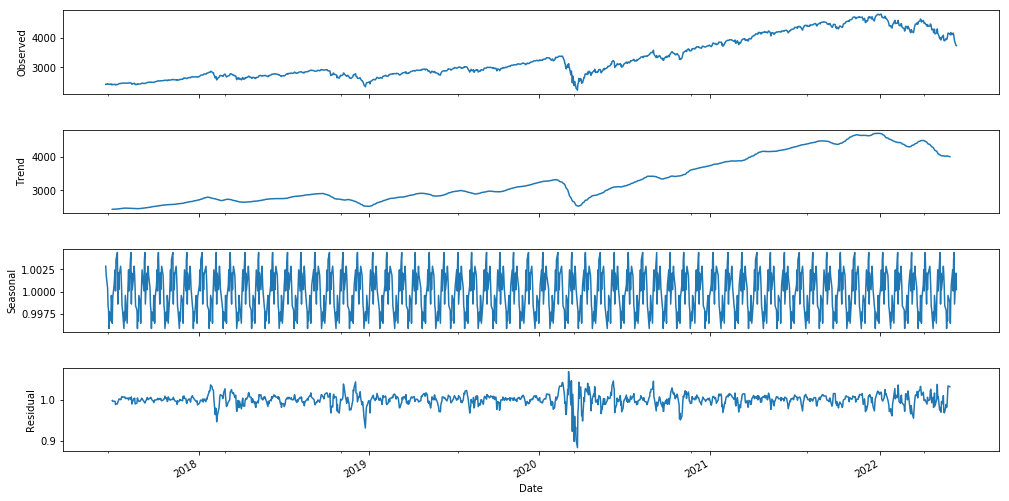

In [17]:
fig = mn_seas.plot();
fig.set_size_inches((16, 8))
plt.show();

<h5> Conclusion </h5>
- There is no clear uptrend in S&P 500 index from 2018 to 2022 and consist of both up & down trend.
- But there is clear cyclic pattern in seasonal component for time period of one month.
- And the residual error is also close to gaussian distribution which is expected.

<h3>d. Weekly Seasonality</h3>

In [18]:
weak_seas = sm.tsa.seasonal_decompose(sp_series['Close'], model = 'multiplicative', freq = 5) #multiplicative instead of additive because this series is not stationery

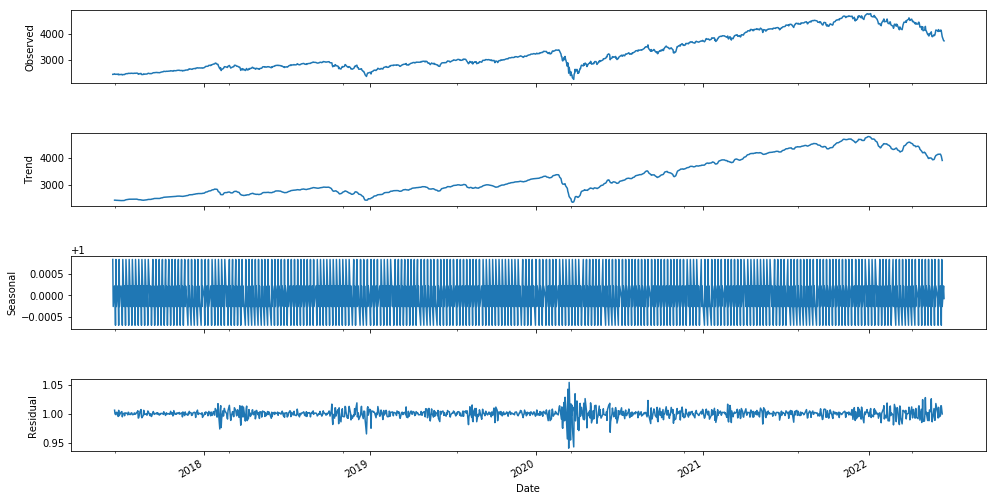

In [19]:
fig = weak_seas.plot();
fig.set_size_inches((16, 8))
plt.show();

<h5> Conclusion </h5>
- There is no clear uptrend in S&P 500 index from 2018 to 2022 and the trend is very volatile which consist of both up &down trend.
- But there is clear cyclic pattern in seasonal component for time period of one week.
- And the residual error is also very small and close to gaussian distribution which is expected.


<h1>3.0.i Moving Averages</h1>

In [20]:
def analyze_ma(data):
    data['MA21'] = data['Close'].rolling(21).mean().shift(1)#monthly average
    data['MA5'] = data['Close'].rolling(5).mean().shift(1)#weekly average
    
    plt.figure(figsize=(18,10))
    plt.plot(data['Close'] , label = 'Mean close price')
    plt.plot(data['MA21'], label = 'Monthly moving avg')
    plt.plot(data['MA5'], label = 'Weekly moving avg')
    plt.title('Tracing the movement of sector stocks with respect to moving averages')
    plt.legend()
    plt.show()
    

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


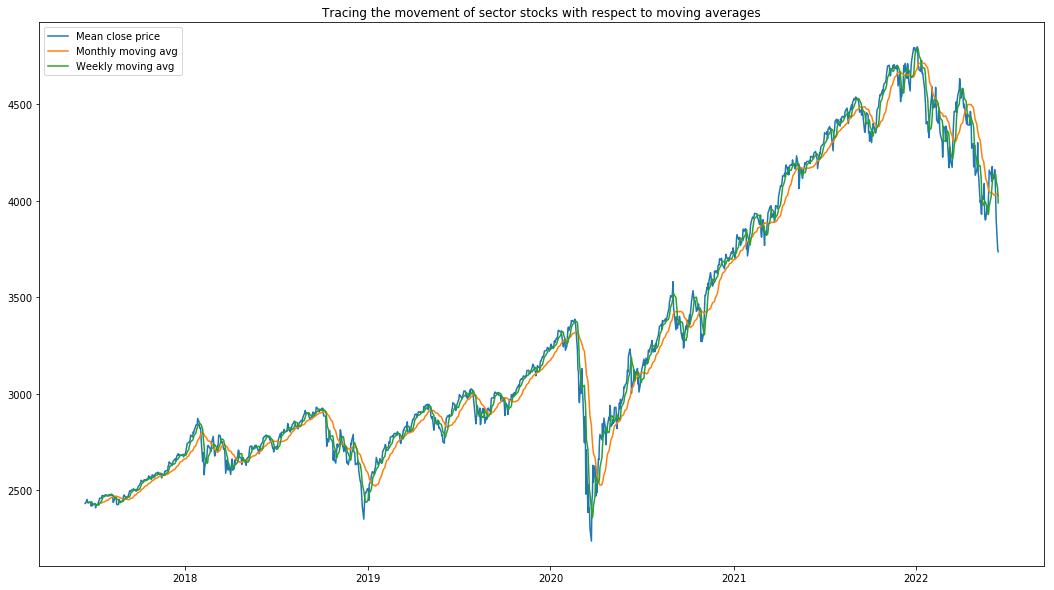

In [21]:
analyze_ma(sp_series)

- From the above plot we can see that, 5 days moving average perform better than 21 days moving average.
- Now let's focus and plot 5 day ma (moving average)

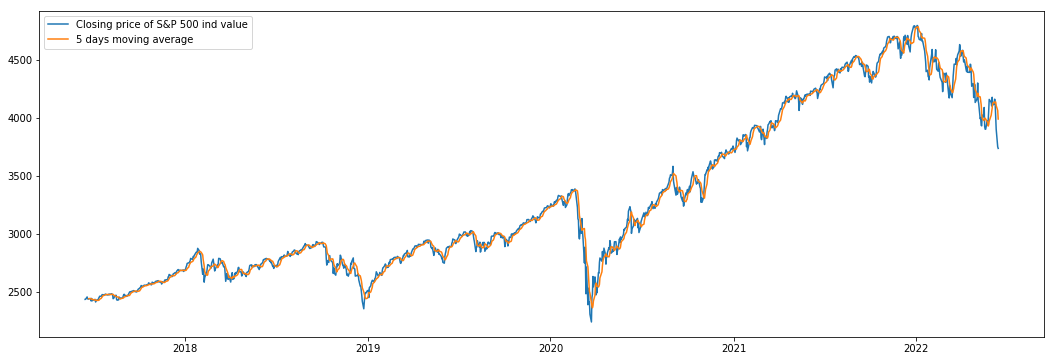

In [22]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(sp_series['Close'],label='Closing price of S&P 500 ind value')
plt.plot(sp_series['MA5'],label = '5 days moving average')
plt.legend()
plt.show()

In [23]:
#let' analyse the loss
# function to calculate absolute percentage error
def cal_ape(y_true, y_pred):
    ape = abs((y_true-y_pred)/y_true) *100
    return ape

In [24]:
sp_series['MA5_error'] = cal_ape(sp_series['Close'], sp_series['MA5'])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
def plot_dist_error(data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))

    ax1.plot(data.dropna())
    ax2.hist(data.dropna(), density = True)
    
    mape = data.mean()
    print(f'Mean absolute percentage error of the model is : {mape:.3f} %')

Mean absolute percentage error of the model is : 1.178 %


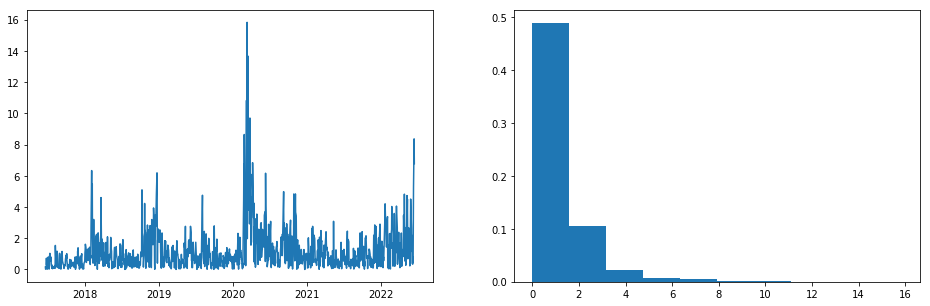

In [26]:
plot_dist_error(sp_series['MA5_error'])

- The mean absolute percentage error is slightly higher in oct - feb for each year, and in year 2022, it is higher as compared to previous year
- From the above plot we can see that approx 50% of time ma5 model predict the future value with less than 1.8 % of absolute percentage error
- And the highest absolute percentage error occured in the year 2020 (app 16%), and one of the biggest reason is that COVID hit the US market very hard at that poeriod of time

Conclusion : 1.178% of absolute percent error is really a good prediction model for simple model like moving average but still it is not reliable because mean abs fluctuation in index value is just 0.805% which is our benchamark.

<h1>3.0.ii Exponentially weighted moving average</h1>

- It is a type of weighted maoving average which gives more important to recent price data
          Vt+1 = Price today * β + (1 – β) Vt
          where Vt = EMA value at current date,
          β - const value which lies between 0-1
  
 - We will preform exponential smoothening on 5 days moving average

In [47]:
sp_series['EWM_0.6'] = sp_series['Close'].ewm(alpha = 0.6, adjust=False, min_periods=5).mean().shift(1)
sp_series['EWM_0.7'] = sp_series['Close'].ewm(alpha = 0.7, adjust=False, min_periods=5).mean().shift(1)
sp_series['EWM_0.8'] = sp_series['Close'].ewm(alpha = 0.8, adjust=False, min_periods=5).mean().shift(1)
sp_series['EWM_0.9'] = sp_series['Close'].ewm(alpha = 0.9, adjust=False, min_periods=5).mean().shift(1)

In [28]:
sp_series[['Close','EWM_0.6','EWM_0.7','EWM_0.8','EWM_0.9']]

,Close,EWM_0.6,EWM_0.7,EWM_0.8,EWM_0.9
Date,,,,,
2017-06-15,2432.459961,NaN,NaN,NaN,NaN
2017-06-16,2433.149902,NaN,NaN,NaN,NaN
2017-06-19,2453.459961,NaN,NaN,NaN,NaN
2017-06-20,2437.030029,NaN,NaN,NaN,NaN
2017-06-21,2435.610107,NaN,NaN,NaN,NaN
2017-06-22,2434.500000,2437.489359,2436.960817,2436.387704,2435.896019
2017-06-23,2438.300049,2435.695743,2435.238245,2434.877541,2434.639602
2017-06-26,2439.070068,2437.258327,2437.381508,2437.615547,2437.934004
2017-06-27,2419.379883,2438.345372,2438.563500,2438.779164,2438.956462


In [29]:
sp_series['2017-06-20':'2017-06-27'][['Close','EWM_0.6','EWM_0.7','EWM_0.8','EWM_0.9']]

,Close,EWM_0.6,EWM_0.7,EWM_0.8,EWM_0.9
Date,,,,,
2017-06-20,2437.030029,NaN,NaN,NaN,NaN
2017-06-21,2435.610107,NaN,NaN,NaN,NaN
2017-06-22,2434.500000,2437.489359,2436.960817,2436.387704,2435.896019
2017-06-23,2438.300049,2435.695743,2435.238245,2434.877541,2434.639602
2017-06-26,2439.070068,2437.258327,2437.381508,2437.615547,2437.934004
2017-06-27,2419.379883,2438.345372,2438.563500,2438.779164,2438.956462


- From the above plot we can see that, when there was gradual change in index value, exp smoothening with every alpha was similar and could easily predict the future price with less error.
- And when there is a very gradual change in index value, ewm with alpha 0.9 works very well as compared to other alpha values
- But when price dropped suddenly form  <b>2439 on 2017-06-26  to 2419 on 2017-06-27</b>, none of the exponential smoothenimg could predict this, but in this case ewm with <b>alpha = 0.6</b> performs slightly better than others

In [30]:
sp_series['2017-06-23':'2017-06-29'][['Close','EWM_0.6','EWM_0.7','EWM_0.8','EWM_0.9']]

,Close,EWM_0.6,EWM_0.7,EWM_0.8,EWM_0.9
Date,,,,,
2017-06-23,2438.300049,2435.695743,2435.238245,2434.877541,2434.639602
2017-06-26,2439.070068,2437.258327,2437.381508,2437.615547,2437.934004
2017-06-27,2419.379883,2438.345372,2438.563500,2438.779164,2438.956462
2017-06-28,2440.689941,2426.966078,2425.134968,2423.259739,2421.337541
2017-06-29,2419.699951,2435.200396,2436.023449,2437.203901,2438.754701


- Since alpha = 0.7 works average in all cases, we will chose alpha  = 0.7
- So, we will chose alpha = 0.7 which performs averge in every scenerios

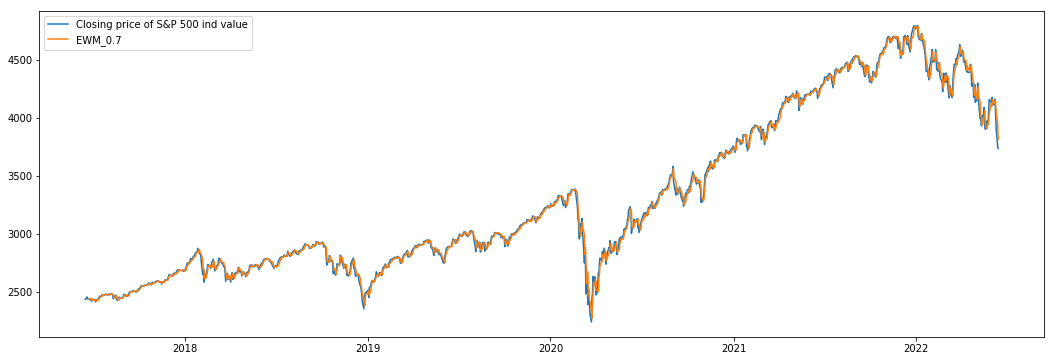

In [31]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(sp_series['Close'],label='Closing price of S&P 500 ind value')
plt.plot(sp_series['EWM_0.7'])
plt.legend()
plt.show()

In [32]:
sp_series['EWM_0.9_error'] = cal_ape(sp_series['Close'], sp_series['EWM_0.9'])
sp_series['EWM_0.8_error'] = cal_ape(sp_series['Close'], sp_series['EWM_0.8'])
sp_series['EWM_0.7_error'] = cal_ape(sp_series['Close'], sp_series['EWM_0.7'])
sp_series['EWM_0.6_error'] = cal_ape(sp_series['Close'], sp_series['EWM_0.6'])

Mean absolute percentage error of the model is : 0.804 %


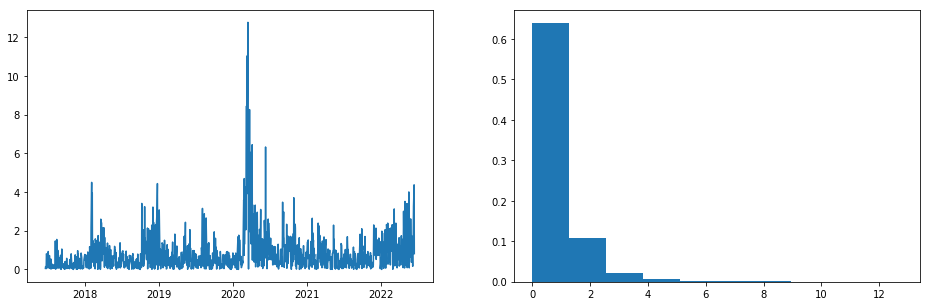

In [33]:
plot_dist_error(sp_series['EWM_0.9_error'])

Mean absolute percentage error of the model is : 0.814 %


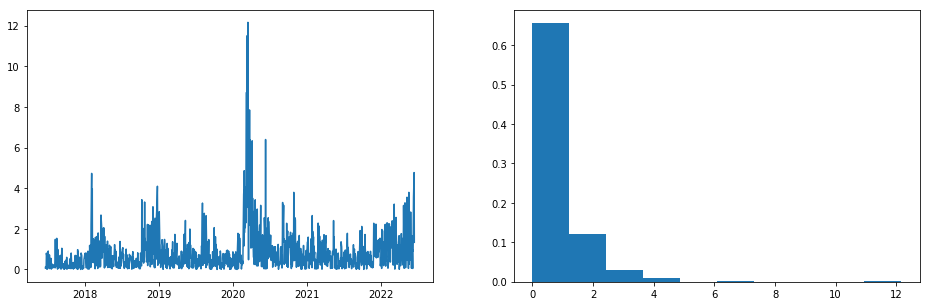

In [34]:
plot_dist_error(sp_series['EWM_0.8_error'])

Mean absolute percentage error of the model is : 0.834 %


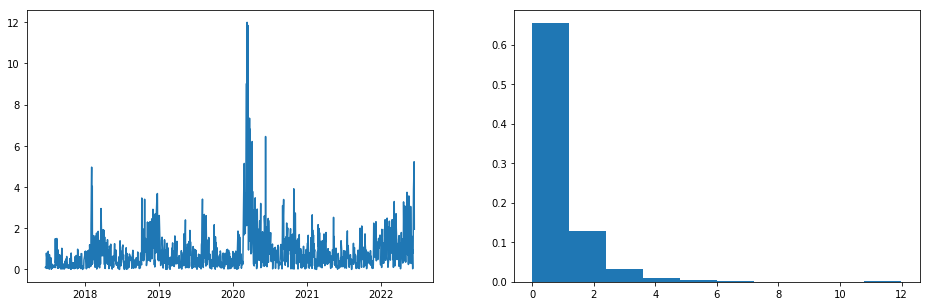

In [35]:
plot_dist_error(sp_series['EWM_0.7_error'])

Mean absolute percentage error of the model is : 0.867 %


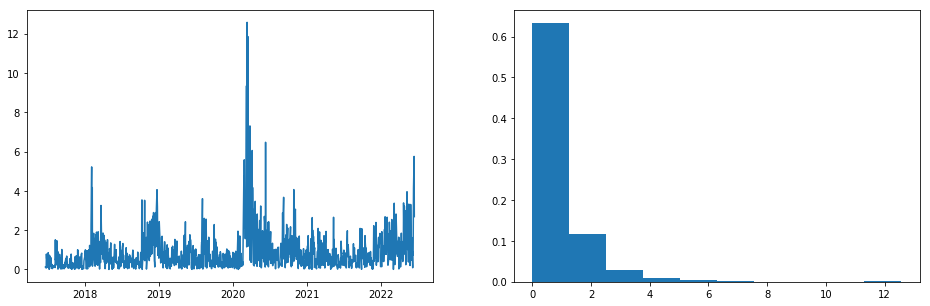

In [36]:
plot_dist_error(sp_series['EWM_0.6_error'])

- The above plot shows us the error distribution of exp smoothening is slightly better than simple moving average, but it is not very much significance.
- From the above mean absolute percentage error plot we can conclude that higher the value of alpha , the more recent data is given more weightage and higher is the accuracy.
- However the mape for alpha = 0.9 is 0.804% which is equal to mean abs fluctuation of 0.805%.

<h1>3.0.iii ARIMA Model</h1>

ARIMA (Auto Regressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA models predicts the future value of a time series based on its own past values, basically its own lags and the lagged forecast errors.


It only works for stationery time series, so you have to convert non-stationey time series into stationery time series.

An ARIMA model is characterized by 3 terms p, d, q:
- p is the order of the AR term
- d is the number of differencing required to make the time series stationary
- q is the order of the MA term


<h3> d order </h3>
- We'll use the Augmented Dickey Fuller (ADF) test to check if the price series is stationary.

- The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

- So, in our case, if the p-value is greater than 0.05 we'll need to find the order of differencing.

So how to determine the right order of differencing?

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the Autocorrelation Function plot reaches zero fairly quick.
- d is the minimum number of differencing operations needed to make the series stationary. If the time series is already stationary, then d is 0. But in stock price forecasting it's almost never 0.

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

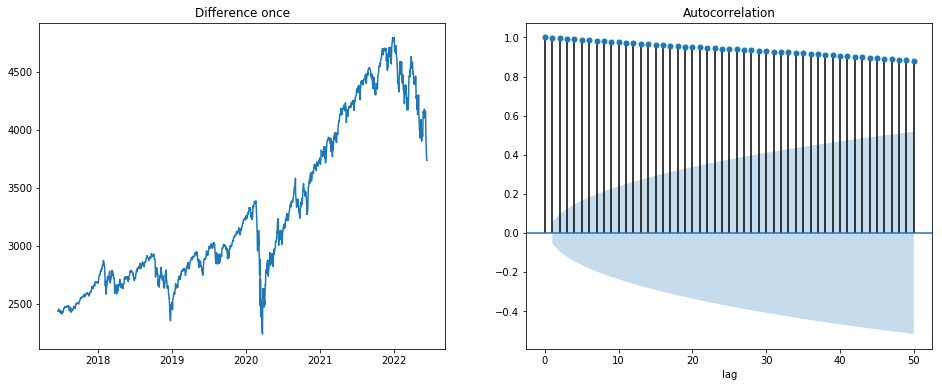

In [40]:
diff0 = sp_series.Close.dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(diff0)
ax1.set_title('Difference once')

plot_acf(diff0, lags = 50, ax = ax2)
plt.xlabel('lag')
plt.show()

In [41]:
#check if series is stationery or not
#H0 : Series is not stationery
#H1 : Serires is stationery
def check_station(series):
    result = adfuller(series)
    p_value = result[1]
    if p_value > 0.05:
         print(f'ADF Statistics: {result[0]}')
         print('----------------------------')
         print(f'p_value : {result[1]}')
         print('----------------------------')
         print('The time series is non - stationery')
         print('----------------------------')
         print('Need to perform differentiation operation to make it stationery')
            
    else:
         print(f'ADF Statistics: {result[0]}')
         print('----------------------------')
         print(f'p_value : {result[1]}')
         print('----------------------------')
         print('The given time series is stationery')

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
check_station(diff0)

ADF Statistics: -1.2835628833287227
----------------------------
p_value : 0.6366583643852818
----------------------------
The time series is non - stationery
----------------------------
Need to perform differentiation operation to make it stationery


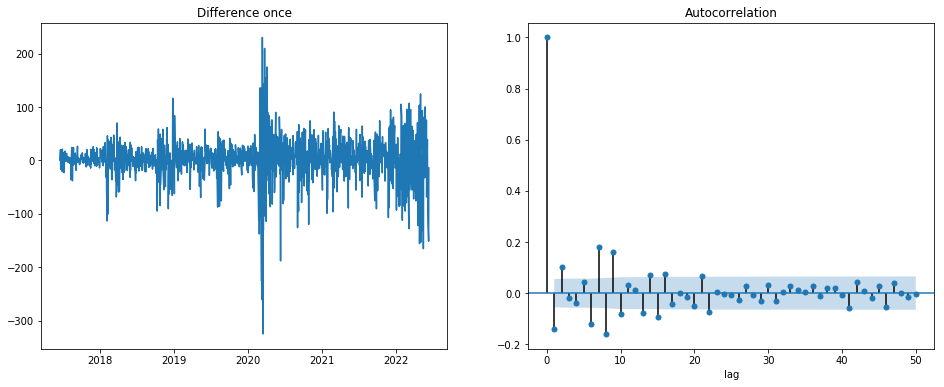

In [44]:
diff1 = sp_series.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(diff1)
ax1.set_title('Difference once')

plot_acf(diff1, lags = 50, ax = ax2)
plt.xlabel('lag')
plt.show()


In [ ]:
check_station(diff1)

<h3>p term </h3>

<b>Auto regressive (AR) process</b> , a time series is said to be AR when present value of the time series can be obtained using previous values of the same time series i.e the present value is weighted average of its past values
 
                   yt = c+β1 yt−1+β2 yt−2 +...+βp yt−p + ϵt
                   
- Where ϵt is a white noise and y’t-₁ and y’t-₂ are the lags. Order p is the lag value after which PACF plot crosses the upper confidence interval for the first time.
- These p lags will act as our features while forecasting the AR time series.
- we can find out the required number of AR(p) terms by examining pacf plot.
- We cannot use the ACF plot here because it will show good correlations even for the lags which are far in the past. If we consider those many features, we will have multicollinearity issues.
- p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors
- We expect PACF to have sharp fall after near lags as these lags near to present can capture the variation so well that we don’t need past lags to predict present.



In [48]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

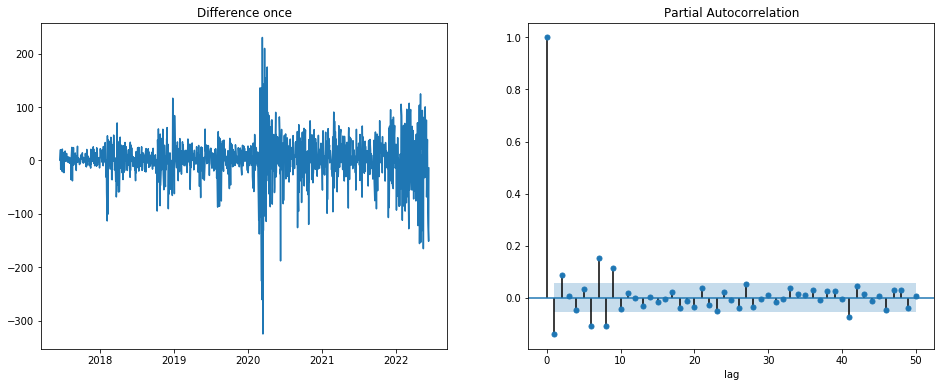

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(diff1)
ax1.set_title('Difference once')

plot_pacf(diff1, lags = 50, ax = ax2)
plt.xlabel('lag')
plt.show()

- As per above plot we have good partial autocorrelation upto 2nd lag, this is the lag after which plot cuts the upper confidence interval. 
- Order p of series obtained by the plot is 2.

<h3>q term</h3>

<b>Moving average (MA) process</b> , a process where the present value of series is defined as a linear combination of past errors. We assume the errors to be independently distributed with the normal distribution. The MA process of order q is defined as             yt = c + θ1 ϵt−1 + θ2 ϵt−2 +...+θp ϵt−p.
- Here ϵt is a white noise

- q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.
- we use acf plot to find the number of ma terms.

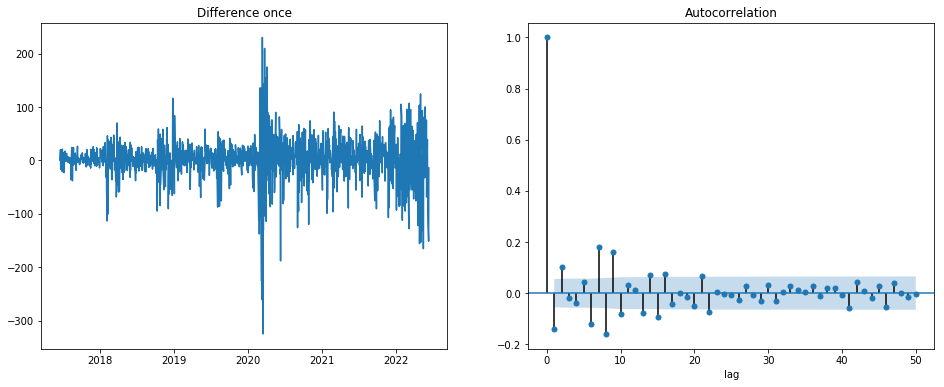

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(diff1)
ax1.set_title('Difference once')

plot_acf(diff1, lags = 50, ax = ax2)
plt.xlabel('lag')
plt.show()


- As per above plot we have good correlation upto 2nd lag, this is the lag after which plot cuts the upper confidence interval. 
- Order q of series obtained by the plot is 2, which is correct as we had defined our series with linear combination of residuals upto lag 2

<h3> Fitting the <b>ARIMA<b> model

In [51]:
train_ind_end = int(0.90 * len(sp_series))
test_ind_start = train_ind_end+1
test_ind_end = len(diff0)
train_data = diff0[:train_ind_end]
test_data = diff0[test_ind_start:]

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
my_order = (2,1,2)
model = ARIMA(train_data, order = my_order)
model1 = model.fit()

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [54]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5636.388
Method:                       css-mle   S.D. of innovations             35.163
Date:                Sat, 24 Sep 2022   AIC                          11284.777
Time:                        15:37:19   BIC                          11314.967
Sample:                             1   HQIC                         11296.182
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9811      0.961      2.062      0.039       0.098       3.864
ar.L1.D.Close    -1.7376      0.030    -57.920      0.000      -1.796      -1.679
ar.L2.D.Close    -0.8846      0.029    -30.052      0.000      -0.942      -0.827
ma.L1.D.Close     1.6023      0.044     36.309      0.000       1.516       1.689
ma.L2.D.Close     0.7266      0.043     16.844      0.000       0.642       0.811
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9822           -0.4072j            1.0632           -0.4374
AR.2           -0.9822           +0.4072j            1.0632            0.4374
MA.1           -1.1026           -0.4007j            1.1731           -0.4445
MA.2           -1.1026           +0.4007j            1.1731            0.4445
-----------------------------------------------------------------------------
"""

- The coefficient value for lags which are used to predict the future value for both AR & MA seems significance and p_value (P>|z|) is also less than 0.05.
- Overall this model look fine

- Now we will predict the future value of stock in test data one by one.
- Once, we have predicted the stock price for a data in test_data for a particular day, we will put it back in train data, and use this data in test_data as well for future prediction of stock price.

In [55]:
pred = test_data.copy() #pred time series will have same index of date as test data and  values of pred will be replaced by pred
for i in range(len(test_data-1)):
    model = ARIMA(train_data, order=(2,1,2))
    model_fit = model.fit()
    output = model_fit.forecast() #output will contain stock price for future dates
    y_hat = output[0][0] #extracting the predicted value for future dates from array of information 
    pred[[i]] = y_hat #appending predicted value to future date index
    train_data = train_data.append(test_data[[i]]) #adding back this test data to traiing data
    

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

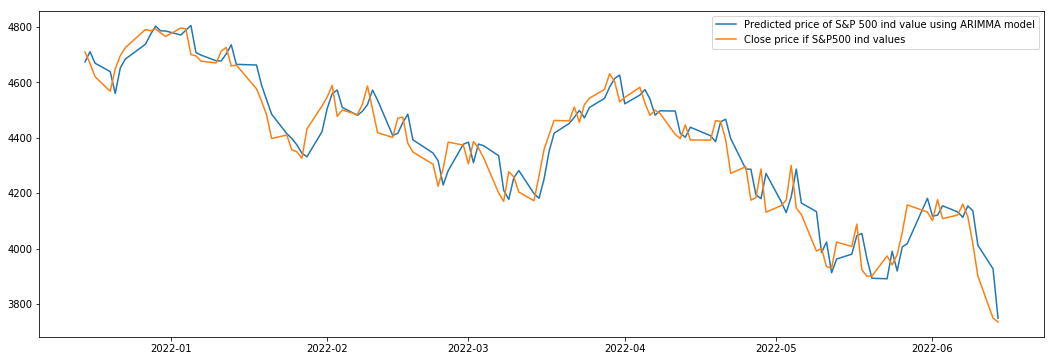

In [56]:
#plotting the predicted value in actual values in test data
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(pred,label='Predicted price of S&P 500 ind value using ARIMMA model')
plt.plot(test_data, label = 'Close price if S&P500 ind values')
plt.legend()
plt.show()

<h3> Conclusion</h3>
- From the above plot we can see that, our model can predict the trend.
- But stil it does not look very accurate

In [57]:
arima_test_error = cal_ape(pred , test_data)

Mean absolute percentage error of the model is : 1.232 %


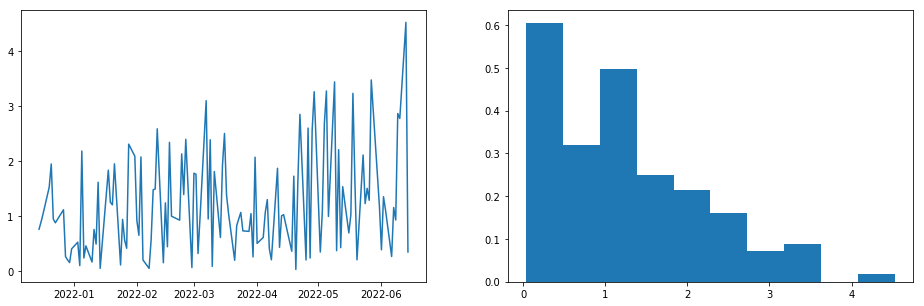

In [58]:
plot_dist_error(arima_test_error)

- From the above plot we can see that,about 50% of the time error lies between 0% to 1.5%.
- In some cases error may even shoot up to 4.5% which is not a good sign for our model.
- But the mape for ARIMA model is less than simple ma(mape of 1.178%) and ewma (mape of 0.804%)

<h2> Key Observations From all model </h2>
- Overall in perspective of statistical model to predict the time series data, Simple Moving average, exponential smmothening MA, and ARIMA model all seems to perform good with mean absolute percentage eroor of 1.178%, 0.805% and 1.232% respectively.
- But when you closely see index values and daily fluctuations in index values which fluctuates between 0% - 1% in most cases, with no model could predict this fluctuation so well.
- So, in future we will see deep learning model like LSTM to catch this level of fluctuations